# Laser Rate Equation Solver

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.axisbelow'] = True 
from scipy.integrate import odeint 
from sklearn.preprocessing import Normalizer 

In [44]:
tau_cap = 45e-12
tau_sb = 500e-12 
tau_s = 300e-12

-0.17220728278145195 -0.1712667474622193 0.40522647733281864 2.4798558473962584e-09


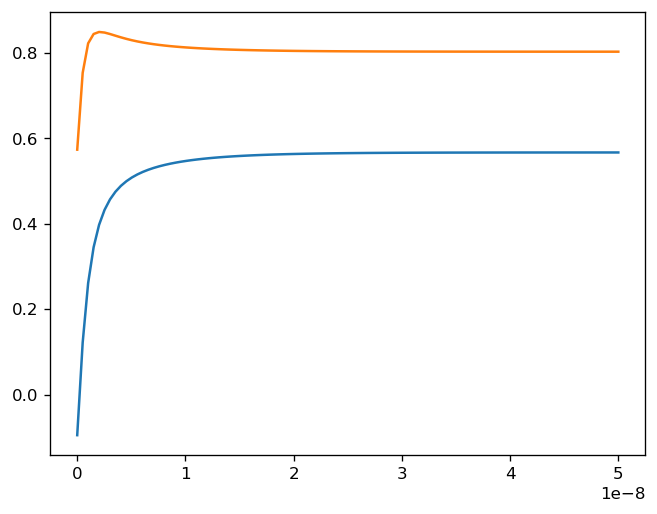

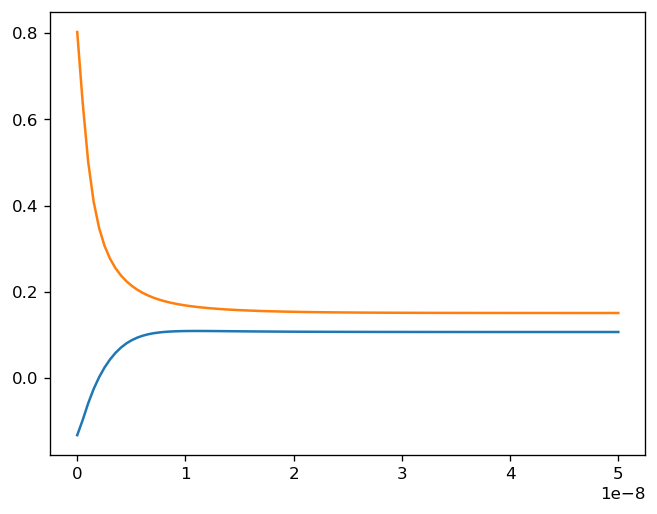

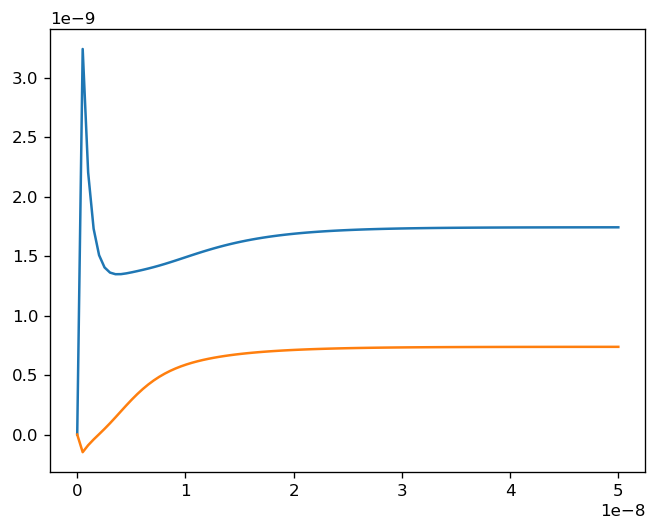

In [102]:
tau_cap = 6000e-12
tau_sb = 80000e-12 
tau_s = 614400e-12

e = 1.6e-19 
eps = 4.5e-17
B_sp = 9.4e-10
C = 3.8e-29
vg = 0.87e10
gam = 0.024 
beta = 6e-4
tau_ph = 1.25e-12
Nab = 5e17 
Na = 7e17
P_spin = -0.198    
Vb = 2.1e-11
Vmqw = 2.8e-11         
n_tr = 9.3e17 if P_spin == 0 else 7.8e17   
dg_dn = 1.1e-14
gain = lambda n,S: dg_dn*(n - n_tr)/(1 + eps*S) 
S0 = 10**2  
i_pump = 4e-3 

# x = [nb_plus, nb_minus, n_plus, n_minus, S_plus, S_minus]
def F(x,t):
    Dx0 = - x[0]/tau_cap + ((1 + P_spin)/2) * i_pump/(e*Vb) - (x[0] - x[1])/tau_sb
    Dx1 = - x[1]/tau_cap + ((1 - P_spin)/2) * i_pump/(e*Vb) + (x[0] - x[1])/tau_sb
    Dx2 = (Vb/Vmqw)*x[0]/tau_cap - vg*gain(x[2],x[5])*x[5] - (x[2] - x[3])/tau_s - B_sp*x[2]*(x[2] + x[3])/2 - C*x[2]*((x[2] + x[3])**2)/2
    Dx3 = (Vb/Vmqw)*x[1]/tau_cap - vg*gain(x[3],x[4])*x[4] + (x[2] - x[3])/tau_s - B_sp*x[3]*(x[2] + x[3])/2 - C*x[3]*((x[2] + x[3])**2)/2
    Dx4 = gam*vg*gain(x[3],x[4])*x[4] + gam*beta*B_sp*x[3]*(x[2] + x[3])/2 - x[4]/tau_ph 
    Dx5 = gam*vg*gain(x[2],x[5])*x[5] + gam*beta*B_sp*x[2]*(x[2] + x[3])/2 - x[5]/tau_ph 
    return [Dx0, Dx1, Dx2, Dx3, Dx4, Dx5]

x_init = [Nab*P_spin, Nab*(1-P_spin), Na*P_spin, Na*(1-P_spin), S0/2, S0/2] 
time = np.linspace(0, 5e-8, 100)  
x_sol = odeint(F, x_init, time) 
Norm = Normalizer('l2')   
x_sol_norm = Norm.transform(x_sol)

intensity = x_sol_norm[:,4] + x_sol_norm[:,5]
PolB = (x_sol_norm[:,0] - x_sol_norm[:,1])/(x_sol_norm[:,0] + x_sol_norm[:,1])
Pol  = (x_sol_norm[:,2] - x_sol_norm[:,3])/(x_sol_norm[:,2] + x_sol_norm[:,3])
PolL = (x_sol_norm[:,4] - x_sol_norm[:,5])/(x_sol_norm[:,4] + x_sol_norm[:,5]) 
print(PolB[-1], Pol[-1], PolL[-1], intensity[-1]) 

plt.figure(1, dpi=120)
plt.plot(time, x_sol_norm[:,0])
plt.plot(time, x_sol_norm[:,1]) 

plt.figure(2, dpi=120)
plt.plot(time, x_sol_norm[:,2]) 
plt.plot(time, x_sol_norm[:,3])

plt.figure(3, dpi=120)
plt.plot(time, x_sol_norm[:,4]) 
plt.plot(time, x_sol_norm[:,5]) 


[7.81704015e+08 2.97816809e+09 6.07338009e+09 1.04651113e+10
 1.70120265e+10 2.77888232e+10 4.93903229e+10 1.19460941e+11
 9.83034273e+11 3.61150110e+12 6.46037583e+12 9.38357892e+12
 1.23852152e+13 1.56473843e+13 2.09893354e+13 2.76596811e+13
 3.44405701e+13 4.12450523e+13 4.80584190e+13 5.48761286e+13
 6.16963062e+13 6.85180263e+13 7.53407814e+13 8.21642667e+13
 8.89882849e+13]
[4.74741716e+08 1.88633910e+09 4.00371919e+09 7.20468147e+09
 1.23090924e+10 2.13342142e+10 4.07918001e+10 1.08197709e+11
 9.68138168e+11 3.59072283e+12 6.43007087e+12 9.33566188e+12
 1.22946804e+13 1.53485849e+13 1.89596104e+13 2.29181051e+13
 2.69059771e+13 3.09004032e+13 3.48974188e+13 3.88957583e+13
 4.28948808e+13 4.68945092e+13 5.08944872e+13 5.48947183e+13
 5.88951375e+13]
[3.06962299e+08 1.09182899e+09 2.06966090e+09 3.26042984e+09
 4.70293404e+09 6.45460899e+09 8.59852284e+09 1.12632321e+10
 1.48961043e+10 2.07782703e+10 3.03049576e+10 4.79170341e+10
 9.05347930e+10 2.98799475e+11 2.02972505e+12 4.741

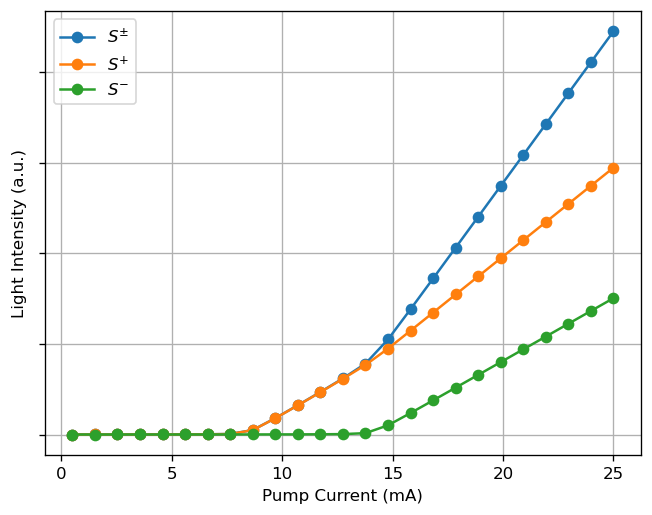

In [103]:
# L-I Characteristics 

i_pumps = np.linspace(0.5, 25, 25)*1e-3  
x_init = [Nab*P_spin, Nab*(1-P_spin), Na*P_spin, Na*(1-P_spin), S0/2, S0/2] 
intensity = np.zeros(len(i_pumps)) 
intp, intm = np.zeros(len(i_pumps)), np.zeros(len(i_pumps)) 
for i_pump in i_pumps: 
    def F(x,t): 
        Dx0 =  - x[0]/tau_cap + ((1 + P_spin)/2) * i_pump/(e*Vb) - (x[0] - x[1])/tau_sb
        Dx1 =  - x[1]/tau_cap + ((1 - P_spin)/2) * i_pump/(e*Vb) + (x[0] - x[1])/tau_sb
        Dx2 = (Vb/Vmqw)*x[0]/tau_cap - vg*gain(x[2],x[5])*x[5] - (x[2] - x[3])/tau_s - B_sp*x[2]*(x[2] + x[3])/2 - C*x[2]*((x[2] + x[3])**2)/2
        Dx3 = (Vb/Vmqw)*x[1]/tau_cap - vg*gain(x[3],x[4])*x[4] + (x[2] - x[3])/tau_s - B_sp*x[3]*(x[2] + x[3])/2 - C*x[3]*((x[2] + x[3])**2)/2
        Dx4 = gam*vg*gain(x[3],x[4])*x[4] + gam*beta*B_sp*x[3]*(x[2] + x[3])/2 - x[4]/tau_ph 
        Dx5 = gam*vg*gain(x[2],x[5])*x[5] + gam*beta*B_sp*x[2]*(x[2] + x[3])/2 - x[5]/tau_ph 
        return [Dx0, Dx1, Dx2, Dx3, Dx4, Dx5]
    x_sol = odeint(F, x_init, time) 
    intp[i_pump==i_pumps], intm[i_pump==i_pumps] = x_sol[:,4][-1], x_sol[:,5][-1] 
    intensity[i_pump==i_pumps] = x_sol[:,4][-1] + x_sol[:,5][-1] 

print(intensity)
print(intp)
print(intm) 

plt.figure(2, dpi=120)
plt.plot(i_pumps*1e3, intensity, marker='o', label = r'$S^{\pm}$')  
plt.plot(i_pumps*1e3, intp, marker='o', label = r'$S^{+}$') 
plt.plot(i_pumps*1e3, intm, marker='o', label = r'$S^{-}$')
plt.legend() 
ax = plt.gca() 
ax.axes.yaxis.set_ticklabels([]) 
plt.xlabel('Pump Current (mA)')
plt.ylabel('Light Intensity (a.u.)') 
plt.grid()   

